In [14]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import os
import re
import itertools as itr
from enm.Enm import Enm
from enm.utils import *
from tqdm import tqdm

In [3]:
with open('../data/interim/pcc.pickle' , 'rb') as f:
    e_pcc = pickle.load(f)

In [4]:
nodes = e_pcc.nodes
n = len(nodes)

In [13]:
prs_path_w= np.zeros((52,n))

In [6]:
import time

start = time.time()
print("hello")
end = time.time()
print(end - start)

hello
0.00020074844360351562


In [11]:
effectors = e_pcc.effectors_df.orf_name.tolist()

In [ ]:
start = time.time()
for i in tqdm(range(52)):
    for j in range(n):
        source = effectors[i]
        target = nodes[j]
        path_w = e_pcc.get_prs_weighted_path(source , target)
        prs_path_w[i,j] = path_w[0]
end = time.time()
print(end - start)

 19%|█▉        | 10/52 [45:39<3:03:34, 262.25s/it]

In [195]:
source = 'cox14'
target = 'fet3'
l1 = e_pcc.get_prs_weighted_path(source,target)#[1]
# sub_list.extend(l1)
# sub = nx.induced_subgraph(e_pcc.graph_gc, l1)
# node_sub=nx.induced_subgraph(sub,[i for i in l1 if i !=target])

In [196]:
node_weight = (e_pcc.prs_mat_df.loc[source,:]).to_dict()
node_weight[source] = 1

In [197]:
nx.set_node_attributes(e_pcc.graph_gc, node_weight,'node_weight')

In [208]:
def weight_func(u, v, d):
    node_u_wt = e_pcc.graph_gc.nodes[u].get("node_weight", 1)
    node_v_wt = e_pcc.graph_gc.nodes[v].get("node_weight", 1)
    #edge_wt = d.get("weight", 1)
    #print(node_u_wt,node_v_wt)
    w = (node_u_wt - node_v_wt)
   # print(w)
    return w# + edge_wt
    

In [222]:
asp = nx.all_pairs_shortest_path(e_pcc.graph_gc)

In [224]:
asp_d = dict(asp)

In [234]:
[]

[['dal82', 'aqy1', 'yhr175w-a', 'yol159c-a', 'ymr158c-a', 'aad10']]

In [275]:
shortest_path_w= np.zeros((n,n))

In [269]:
import itertools

In [276]:
def find_w(mat, i, j, source_df):
    res = source_df.loc[nodes[i],asp_d[nodes[i]][nodes[j]]].sum()
#    print(i,j)
    mat[i,j] = res 

In [273]:
prdct = list(itertools.product(range(n),range(n)))

In [ ]:
[find_w(shortest_path_w, i,j,e_pcc.prs_mat_df) for (i,j) in tqdm(prdct)]




  0%|          | 0/26863489 [00:00<?, ?it/s]


  0%|          | 101/26863489 [00:00<7:26:45, 1002.16it/s]


  0%|          | 239/26863489 [00:00<6:50:07, 1091.68it/s]


  0%|          | 409/26863489 [00:00<6:06:20, 1222.11it/s]


  0%|          | 583/26863489 [00:00<5:33:54, 1340.84it/s]


  0%|          | 757/26863489 [00:00<5:11:13, 1438.56it/s]


  0%|          | 929/26863489 [00:00<4:56:07, 1511.88it/s]


  0%|          | 1101/26863489 [00:00<4:45:26, 1568.43it/s]


  0%|          | 1275/26863489 [00:00<4:37:25, 1613.80it/s]


  0%|          | 1447/26863489 [00:00<4:32:29, 1642.97it/s]


  0%|          | 1621/26863489 [00:01<4:28:22, 1668.22it/s]


  0%|          | 1807/26863489 [00:01<4:20:21, 1719.55it/s]


  0%|          | 1992/26863489 [00:01<4:15:02, 1755.36it/s]


  0%|          | 2176/26863489 [00:01<4:11:32, 1779.73it/s]


  0%|          | 2362/26863489 [00:01<4:08:27, 1801.82it/s]


  0%|          | 2547/26863489 [00:01<4:06:41, 1814.74it/s]


  0%|          | 2733/2686

In [279]:
e_pcc.prs_mat_df.to_csv('../data/interim/prs_mat_df.csv')

In [ ]:
for i in tqdm(range(n)):
    for j in range(n):
        shortest_path_w[i,j] = e_pcc.prs_mat_df.loc[nodes[i],asp_d[nodes[i]][nodes[j]]].sum()
#





  0%|          | 0/5183 [00:00<?, ?it/s]



  0%|          | 1/5183 [00:03<4:40:56,  3.25s/it]



  0%|          | 2/5183 [00:06<4:41:03,  3.25s/it]



  0%|          | 3/5183 [00:09<4:42:58,  3.28s/it]



  0%|          | 4/5183 [00:13<4:40:10,  3.25s/it]



  0%|          | 5/5183 [00:16<4:37:19,  3.21s/it]



  0%|          | 6/5183 [00:19<4:36:17,  3.20s/it]



  0%|          | 7/5183 [00:22<4:42:22,  3.27s/it]



  0%|          | 8/5183 [00:26<4:42:29,  3.28s/it]



  0%|          | 9/5183 [00:29<4:42:40,  3.28s/it]



  0%|          | 10/5183 [00:32<4:49:56,  3.36s/it]



  0%|          | 11/5183 [00:36<4:53:13,  3.40s/it]



  0%|          | 12/5183 [00:40<5:00:34,  3.49s/it]



  0%|          | 13/5183 [00:43<4:51:16,  3.38s/it]



  0%|          | 14/5183 [00:46<4:46:26,  3.32s/it]



  0%|          | 15/5183 [00:49<4:35:07,  3.19s/it]



  0%|          | 16/5183 [00:52<4:29:41,  3.13s/it]



  0%|          | 17/5183 [00:55<4:29:44,  3.13s/it]



  0%|          | 18/5183 [

In [ ]:
pd.DataFrame(shortest_path_w,columns=nodes,index=nodes).to_csv('../data/interim/shortest_path_prs_weights.csv')

In [283]:
shortest_path_w_df = pd.DataFrame(shortest_path_w,columns=nodes,index=nodes)

In [290]:
help(shortest_path_w_df.melt)

Help on method melt in module pandas.core.frame:

melt(id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    
    .. versionadded:: 0.20.0
    
    Parameters
    ----------
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'vari

In [292]:
shortest_path_w_df_long = shortest_path_w_df.reset_index().melt(id_vars='index').rename(columns={'index':'gene1','variable':'gene2','value':'pcc_weight'})

In [295]:
path_w_sorted = shortest_path_w_df_long.sort_values('pcc_weight',ascending=False).reset_index(drop=True)

In [301]:
shortest_path_w_df.loc['ctf4', 'rtg1']

0.052056739972647495

In [302]:
shortest_path_w_df.loc['ydl159w-a', 'rtg1']

0.9631645630767491

In [370]:
path_w_sorted.head(50)

,gene1,gene2,pcc_weight
0,ydr157w,rma1,3.965972
1,ydr157w,agp1,3.965972
2,jjj3,ypl109c,3.957535
3,ydl159w-a,idh2,3.777628
4,ydl159w-a,irc14,3.777628
5,edc2,ypl109c,2.995749
6,bap2,rma1,2.994842
7,bap2,agp1,2.994842
8,rtg1,idh2,2.994773
9,rtg1,irc14,2.994773


In [371]:
for i in [10,50,100,1000,5000,10000,50000,100000]:
    top100k = path_w_sorted.head(i)
    sensors_top = top100k.loc[top100k.gene2.isin(e_pcc.sensors_df.orf_name)]
    print(sensors_top.shape[0],i, sensors_top.shape[0]/i)

10 10 1.0
50 50 1.0
72 100 0.72
160 1000 0.16
218 5000 0.0436
235 10000 0.0235
718 50000 0.01436
1256 100000 0.01256


(array([218.,   0.,   6., ...,  10.,   9.,   4.]),
 array([0.00000000e+00, 2.68422430e+03, 5.36844860e+03, ...,
        2.68368746e+07, 2.68395588e+07, 2.68422430e+07]),
 <BarContainer object of 10000 artists>)

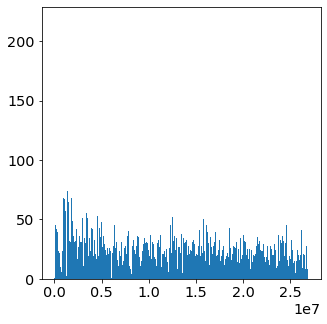

In [341]:
path_w_sorted.loc[(path_w_sorted.pcc_weight>0)&(path_w_sorted.gene2.isin(e_pcc.sensors_df.orf_name))]
         #.head(40)#=='ctf4')&(path_w_sorted.gene2=='rtg1')]

In [364]:
aaa = [a for a in nx.all_simple_paths(e_pcc.graph_gc, 'cox14', 'fet3',cutoff=6)]

KeyboardInterrupt: 

In [366]:
aaa=[a for a in nx.all_shortest_paths(e_pcc.graph_gc,'cox14','fet3')]

In [368]:
aaa

[['cox14', 'mto1', 'sbh2', 'sfc1', 'sit1', 'ftr1', 'fet3'],
 ['cox14', 'mto1', 'sbh2', 'zrt2', 'sit1', 'ftr1', 'fet3'],
 ['cox14', 'qdr1', 'yil108w', 'fit1', 'sit1', 'ftr1', 'fet3']]

In [367]:
for i in range(6):
    print(e_pcc.prs_mat_df.loc['cox14',aaa[i]].sum())

0.025459808487195975
0.025410858407249545
0.031062128003930815


IndexError: list index out of range

In [328]:
e_pcc.df.loc[e_pcc.df.orf_name=='rma1']

,orf_name,deg,eff,sens,trans,eigenvec_centr,closeness_centr,smallest_eigenvec,neighbor_degree,gene1,Systematic gene name
4914,rma1,1,1.670132,34.738685,0.0,2.054349e-15,0.095424,0.458295,2.0,rma1,YKL132C


In [315]:
path_w_sorted.head(10)#.loc[(path_w_sorted.gene1=='ctf4')&(path_w_sorted.gene2=='rtg1')]

,gene1,gene2,pcc_weight
0,ydr157w,rma1,3.965972
1,ydr157w,agp1,3.965972
2,jjj3,ypl109c,3.957535
3,ydl159w-a,idh2,3.777628
4,ydl159w-a,irc14,3.777628
5,edc2,ypl109c,2.995749
6,bap2,rma1,2.994842
7,bap2,agp1,2.994842
8,rtg1,idh2,2.994773
9,rtg1,irc14,2.994773


In [29]:
effector_path_w = pd.DataFrame(prs_path_w, index=effectors, columns=nodes)

In [ ]:
effector_path_w.to_csv('../data/interim/effector_path_weights.csv')

In [85]:
eff_path_w_long = effector_path_w.reset_index().melt(id_vars='index').sort_values('value',ascending=True).reset_index(drop=True).rename(columns={'index':'source','variable':'target','value':'weight'})

In [87]:
eff_path_w_long.iloc[52:,]

,source,target,weight
52,aim10,ctr1,2.021197e+00
53,cox15,hem4-5001,2.022436e+00
54,cox15,ssa2,2.022436e+00
55,coq1,rib5-5002,3.410848e+00
56,pet54,rib5-5002,3.497388e+00
...,...,...,...
269511,cog8,rim15,2.160935e+12
269512,coa1,ylr287c,4.818706e+12
269513,ctf4,rps18a,5.904550e+12
269514,gpi17-5001,cdc20-3,2.712492e+13


In [88]:
eff_path_w_long.loc[eff_path_w_long.target.isin(e_pcc.sensors_df.orf_name)]

,source,target,weight
8248,coa3,met7,4.697046e+01
9249,gep5,met7,5.424068e+01
10850,coq1,met7,6.697611e+01
11119,cyc3,met7,6.900834e+01
11349,cox11,met7,7.067763e+01
...,...,...,...
263954,cox17,sti1,1.169111e+06
263955,cox17,ram1-supp1,1.169379e+06
266923,cox16,hsc82,5.325953e+06
266924,cox16,sti1,5.326068e+06


In [37]:
pos = e_pcc.graph_gc.nodes(data='pos')

In [94]:
i = 53

In [115]:
i=i+1

In [120]:
source = 'ctf4'#eff_path_w_long.at[i,'source']
target = 'hhf1'#eff_path_w_long.at[i,'target']
l1 = e_pcc.get_prs_weighted_path(source,target)[1]

In [121]:
l1

['ctf4', 'hhf1']

In [123]:
effector_path_w.at[source,target]

26.040960280957783

In [124]:
effector_path_w.at[source,'hht1']

1200.791699163916

In [136]:
effector_path_w.at[source,'irc14']

6041.496749504587

In [130]:
effector_path_w.at[source,'mks1-supp1']

5981.341124246451

In [118]:
eff_path_w_long.iloc[i,:]

source        pet54
target    rib5-5002
weight      3.49739
Name: 56, dtype: object

(-4.320120990276337, 4.355751931667328, -4.392840337753296, 4.249647092819214)

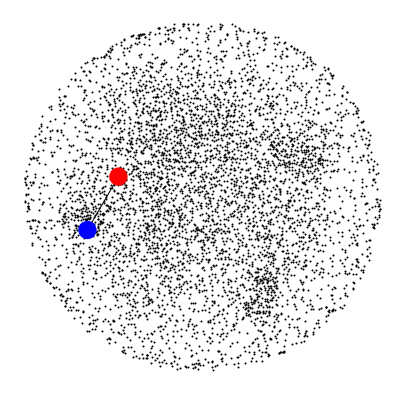

In [122]:
sub_list  = [ ]

sub_list.extend(l1)
sub = nx.induced_subgraph(e_pcc.graph_gc, l1)
node_sub=nx.induced_subgraph(sub,[i for i in l1 ])
#print(l1)
fig, ax = plt.subplots(figsize=(7,7))
legend_elements = [    ]
nx.draw_networkx_nodes(e_pcc.graph_gc, pos=pos, node_size=1, ax=ax, node_color='black')
nx.draw_networkx_nodes(node_sub,pos=pos,alpha=1,
                    #  node_size = [prs_mat_df.loc[source,:].to_dict()[i]*10000 for i in sub.nodes],
                    # node_shape = ['^' if i == target else 'o' for i in sub.nodes],
    node_color = ['blue'  if i ==source else 'red' if i==target else 'black' for i in node_sub.nodes])

nx.draw_networkx_edges(sub,pos=pos)
# for itr, i in enumerate(sensor_order):
#     #print(i, effector_colors[itr])
#     if i ==sens_group:
#         orf_names_to_plot = sensors_pcc.loc[sensors_pcc.label==i, 'orf_name'].tolist()
#         sub_list.extend(orf_names_to_plot)
#         nx.draw_networkx_nodes(e_pcc.graph_gc, nodelist=orf_names_to_plot, node_size=200, pos=pos,
#                             node_color=sensor_colors[itr],
#                             node_shape='^',edgecolors='black',
#                             linewidths=1)
#         nx.draw_networkx_edges(nx.induced_subgraph(e_pcc.graph_gc, orf_names_to_plot), ax=ax , pos=pos, edge_color='red',alpha=0.5)

#         legend_elements.append(
#             Line2D([0], [0], marker='^', color='black', label=f'Sensors ({i})',
#                                 markerfacecolor=sensor_colors[itr], markersize=12, linestyle="None")
#         )

# for itr, i in enumerate(effector_order):
#     if i == eff_group:
#         orf_names_to_plot = effector_pcc.loc[effector_pcc.go_group==i,'orf_name'].tolist()
#         sub_list.extend(orf_names_to_plot)
#         nx.draw_networkx_nodes(e_pcc.graph_gc, nodelist=orf_names_to_plot, node_size=200, pos=pos,
#                             node_color=effector_colors[itr],
#                             node_shape='s',edgecolors='black',
#                             linewidths=1)
#         nx.draw_networkx_edges(nx.induced_subgraph(e_pcc.graph_gc, orf_names_to_plot), ax=ax , pos=pos, edge_color='blue',alpha=0.5)

ax.set_facecolor('white')
ax.axis('off')

# if snakemake.params['save']:
#     plt.savefig(f'{figure_folder}/fig5f.png',bbox_inches='tight',dpi=150)
# nx.write_edgelist(nx.induced_subgraph(e_pcc.graph_gc,sub_list),f'{figure_folder}/path2.csv', delimiter=',',data=False)


In [312]:
help(nx.write_edgelist)

Help on function write_edgelist in module networkx.readwrite.edgelist:

write_edgelist(G, path, comments='#', delimiter=' ', data=True, encoding='utf-8')
    Write graph as a list of edges.
    
    Parameters
    ----------
    G : graph
       A NetworkX graph
    path : file or string
       File or filename to write. If a file is provided, it must be
       opened in 'wb' mode. Filenames ending in .gz or .bz2 will be compressed.
    comments : string, optional
       The character used to indicate the start of a comment
    delimiter : string, optional
       The string used to separate values.  The default is whitespace.
    data : bool or list, optional
       If False write no edge data.
       If True write a string representation of the edge data dictionary..
       If a list (or other iterable) is provided, write the  keys specified
       in the list.
    encoding: string, optional
       Specify which encoding to use when writing file.
    
    Examples
    --------
    >>>

In [313]:
nx.write_edgelist(nx.induced_subgraph(e_pcc.graph_gc, e_pcc.sensors_df.orf_name),'../data/interim/sensor_induced.edgelist',data=False)